In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset to the python environment

In [2]:
data = pd.read_excel("iris_new.xls")

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Do necessary pre-processing steps

In [7]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

array([[<AxesSubplot:title={'center':'SL'}>,
        <AxesSubplot:title={'center':'SW'}>],
       [<AxesSubplot:title={'center':'PL'}>,
        <AxesSubplot:title={'center':'PW'}>]], dtype=object)

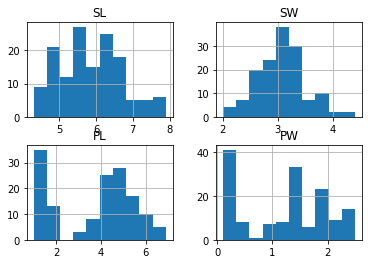

In [8]:
data.hist()

In [9]:
data['SL'] = data['SL'].fillna(data['SL'].median())

In [10]:
data['SW'] = data['SW'].fillna(data['SW'].median())

In [11]:
data['PL'] = data['PL'].fillna(data['PL'].median())

In [12]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Text(0.5, 1.0, 'Box plot of SL')

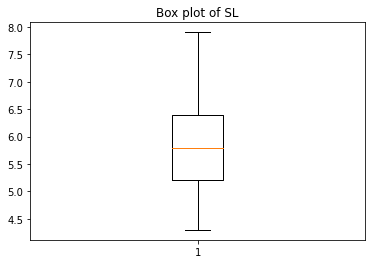

In [13]:
# Checking for Outliers in SL column
plt.boxplot(data['SL'])
plt.title('Box plot of SL')

Text(0.5, 1.0, 'Box plot of SW')

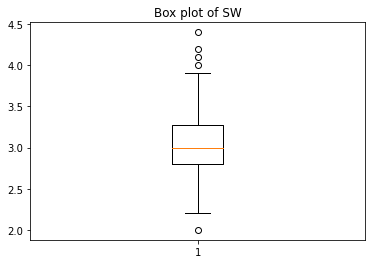

In [14]:
# Checking for Outliers in SW column
plt.boxplot(data['SW'])
plt.title('Box plot of SW')

In [15]:
Q1 = np.percentile(data['SW'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['SW'], 50, interpolation = 'midpoint')
Q3 = np.percentile(data['SW'], 75, interpolation = 'midpoint')

In [16]:
IQR = Q3-Q1
print(Q1,Q2,Q3)

2.8 3.0 3.25


In [17]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

In [18]:
low_lim

2.1249999999999996

In [19]:
up_lim

3.9250000000000003

In [20]:
outlier = []
for x in data['SW']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [21]:
#to find the index of the outliers
ind1 = data['SW']>up_lim
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [22]:
data.drop([14, 15, 32, 33], inplace = True)

Text(0.5, 1.0, 'BOXPLOT OF SW')

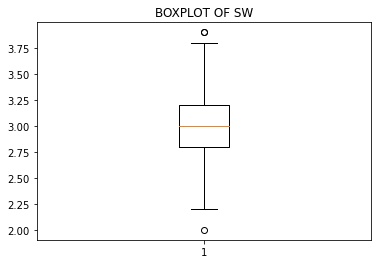

In [23]:
plt.boxplot(data['SW'])
plt.title('BOXPLOT OF SW')

Text(0.5, 1.0, 'Box plot of PL')

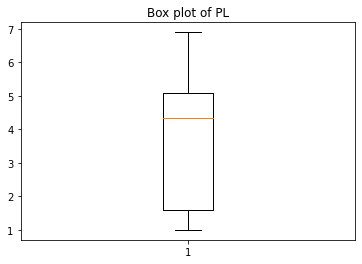

In [24]:
# Checking for Outliers in PL
plt.boxplot(data['PL'])
plt.title('Box plot of PL')

Text(0.5, 1.0, 'Box plot of PW')

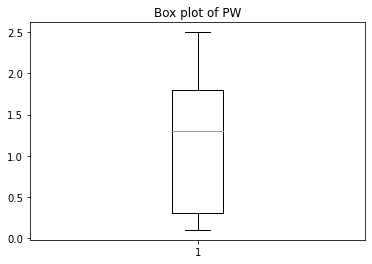

In [25]:
# Checking for Outliers in PW
plt.boxplot(data['PW'])
plt.title('Box plot of PW')

# Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)


# splitting the data

In [26]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [27]:
X = data.drop(['Classification'], axis = 1)

In [28]:
y = data['Classification']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42, test_size = 0.2)

In [30]:
X_train.shape

(116, 4)

# logistic regression

In [31]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)
y_pred = logit_model.predict(X_test)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
 from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [33]:
print("Accuracy is:", accuracy_score(y_test, y_pred))

Accuracy is: 0.9333333333333333


In [34]:
print("Precision is:", precision_score(y_test, y_pred, average = 'micro'))

Precision is: 0.9333333333333333


In [35]:
print("Recall is:", recall_score(y_test, y_pred, average = 'micro'))

Recall is: 0.9333333333333333


In [36]:
print("f1 score is:", f1_score(y_test, y_pred, average = 'micro'))

f1 score is: 0.9333333333333333


In [37]:
confusion_matrix(y_test, y_pred)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

# KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3, 15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)

In [39]:
acc_values

[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 1.0,
 1.0]

Text(0, 0.5, 'accuracy')

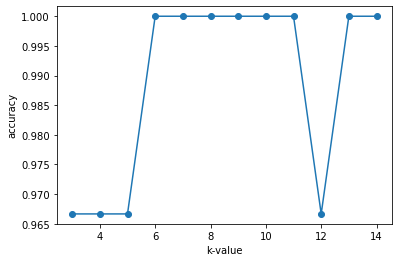

In [40]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k-value')
plt.ylabel('accuracy')

In [41]:
# Now we understand K=5 is the highest
classifier = KNeighborsClassifier(n_neighbors=14, metric='minkowski')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [42]:
print("Accuracy is:", accuracy_score(y_test, y_pred))

Accuracy is: 1.0


In [43]:
print("Precision is:", precision_score(y_test, y_pred, average = 'micro'))

Precision is: 1.0


In [44]:
print("Recall is:", recall_score(y_test, y_pred, average = 'micro'))
print("f1 score is:", f1_score(y_test, y_pred, average = 'micro'))

Recall is: 1.0
f1 score is: 1.0


In [45]:
confusion_matrix(y_test, y_pred)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 10]], dtype=int64)

# Support vector machine

In [46]:
#linear SVM classifier
from sklearn.svm import SVC
svm_linear = SVC(kernel = 'linear')
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)

In [47]:
print("Accuracy is:", accuracy_score(y_test, y_pred))

Accuracy is: 0.9666666666666667


In [48]:
print("Precision is:", precision_score(y_test, y_pred, average = 'micro'))

Precision is: 0.9666666666666667


In [49]:
print("Recall is:", recall_score(y_test, y_pred, average = 'micro'))
print("f1 score is:", f1_score(y_test, y_pred, average = 'micro'))

Recall is: 0.9666666666666667
f1 score is: 0.9666666666666667


In [50]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [51]:
svm_linear = SVC(kernel = 'linear')
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)

In [52]:
print("Accuracy is:", accuracy_score(y_test, y_pred))

Accuracy is: 0.6


In [53]:
print("Precision is:", precision_score(y_test, y_pred, average = 'micro'))

Precision is: 0.6


In [54]:
print("Recall is:", recall_score(y_test, y_pred, average = 'micro'))
print("f1 score is:", f1_score(y_test, y_pred, average = 'micro'))

Recall is: 0.6
f1 score is: 0.6


# Decision tree algorithm

In [55]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)

In [56]:
print("Accuracy is:", accuracy_score(y_test, y_pred))

Accuracy is: 0.4


In [57]:
print("Precision is:", precision_score(y_test, y_pred, average = 'micro'))

Precision is: 0.4


In [58]:
print("Recall is:", recall_score(y_test, y_pred, average = 'micro'))
print("f1 score is:", f1_score(y_test, y_pred, average = 'micro'))

Recall is: 0.4
f1 score is: 0.4000000000000001


In [59]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 8,  0,  0],
       [ 2,  8,  0]], dtype=int64)

# Random forest classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [61]:
print("Accuracy is:", accuracy_score(y_test, y_pred))
print("Precision is:", precision_score(y_test, y_pred, average='micro'))
print("Recall is:", recall_score(y_test, y_pred, average='micro'))
print("f1 score is:", f1_score(y_test, y_pred, average='micro'))

Accuracy is: 0.4
Precision is: 0.4
Recall is: 0.4
f1 score is: 0.4000000000000001


In [62]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 8,  0,  0],
       [ 2,  8,  0]], dtype=int64)

# Among the classification models, the best result is provided by KNN model with Accuracy is: 1.0, Precision is: 1.0, Recall is: 1.0, f1 score is: 1.0

# Confusion matrix = array([[12,  0,  0], [ 0,  8,  0], [ 0,  0, 10]], dtype=int64)